In [3]:
from edc import check_compatibility
check_compatibility("user-0.24.5", dependencies=["SH"])



---------

The following environment variables are available:

* `SH_CLIENT_SECRET`, `SH_CLIENT_NAME`, `SH_INSTANCE_ID`, `SH_CLIENT_ID`


### Installing packages, setting up variables

In [4]:
import os
import numpy as np
import pygrib # If using EDC JupyterLab, please install pygrib first --> "pip install pygrib"
import cdsapi
import matplotlib.pyplot as plt

In [5]:
import geojson
import shapely.wkt


area = shapely.wkt.loads('POLYGON((11.9 44.45, 11.9 45.9, 13.9 45.9, 13.9 44.45, 11.9 44.45))')
gj_feat = geojson.Feature(geometry=area, properties={})

In [6]:
import shapely.geometry
import IPython.display
IPython.display.GeoJSON(gj_feat)

<IPython.display.GeoJSON object>

### API request to Copernicus Climate Data Store (downloads rain data to computer)

In [11]:
c = cdsapi.Client()

c.retrieve(
    'reanalysis-era5-land-monthly-means',
    {
        'product_type': 'monthly_averaged_reanalysis',
        'variable': '2m_temperature',
        'year': [
            '1981', '1982', '1983',
            '1984', '1985', '1986',
            '1987', '1988', '1989',
            '1990', '1991', '1992',
            '1993', '1994', '1995',
            '1996', '1997', '1998',
            '1999', '2000', '2001',
            '2002', '2003', '2004',
            '2005', '2006', '2007',
            '2008', '2009', '2010',
            '2011', '2012', '2013',
            '2014', '2015', '2016',
            '2017', '2018', '2019',
            '2020',
        ],
        'month': [
            '01', '02', '03',
            '04', '05', '06',
            '07', '08', '09',
            '10', '11', '12',
        ],
        'time': '00:00',
        'format': 'grib',
        'area': [
            45.9, 11.9, 44.45,
            13.9,
        ],
    },
    'SST_81-20_venice.grib')

2021-06-29 20:22:11,746 INFO Welcome to the CDS
2021-06-29 20:22:11,747 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-land-monthly-means
2021-06-29 20:22:11,792 INFO Request is completed
2021-06-29 20:22:11,793 INFO Downloading https://download-0010.copernicus-climate.eu/cache-compute-0010/cache/data5/adaptor.mars.internal-1624997694.368703-16186-14-09c53135-29ea-43cd-8e62-ebf5a1678552.grib to SST_81-20_venice.grib (225K)
2021-06-29 20:22:11,994 INFO Download rate 1.1M/s


Result(content_length=230400,content_type=application/x-grib,location=https://download-0010.copernicus-climate.eu/cache-compute-0010/cache/data5/adaptor.mars.internal-1624997694.368703-16186-14-09c53135-29ea-43cd-8e62-ebf5a1678552.grib)

In [12]:
#Opening the downloaded dataset
sst_iter = pygrib.open('SST_81-20_venice.grib')

In [13]:
for month in sst_iter :
    print(month)

1:2 metre temperature:K (avgid):regular_ll:surface:level 0:fcst time 1-24 hrs (avgid):from 198101010000
2:2 metre temperature:K (avgid):regular_ll:surface:level 0:fcst time 1-24 hrs (avgid):from 198102010000
3:2 metre temperature:K (avgid):regular_ll:surface:level 0:fcst time 1-24 hrs (avgid):from 198103010000
4:2 metre temperature:K (avgid):regular_ll:surface:level 0:fcst time 1-24 hrs (avgid):from 198104010000
5:2 metre temperature:K (avgid):regular_ll:surface:level 0:fcst time 1-24 hrs (avgid):from 198105010000
6:2 metre temperature:K (avgid):regular_ll:surface:level 0:fcst time 1-24 hrs (avgid):from 198106010000
7:2 metre temperature:K (avgid):regular_ll:surface:level 0:fcst time 1-24 hrs (avgid):from 198107010000
8:2 metre temperature:K (avgid):regular_ll:surface:level 0:fcst time 1-24 hrs (avgid):from 198108010000
9:2 metre temperature:K (avgid):regular_ll:surface:level 0:fcst time 1-24 hrs (avgid):from 198109010000
10:2 metre temperature:K (avgid):regular_ll:surface:level 0:fcst

In [14]:
for attr in month.keys():
    print(attr)

globalDomain
GRIBEditionNumber
eps
offsetSection0
section0Length
totalLength
editionNumber
WMO
productionStatusOfProcessedData
section1Length
wrongPadding
table2Version
centre
centreDescription
generatingProcessIdentifier
gridDefinition
indicatorOfParameter
parameterName
parameterUnits
indicatorOfTypeOfLevel
pressureUnits
typeOfLevelECMF
typeOfLevel
level
yearOfCentury
month
day
hour
minute
second
unitOfTimeRange
P1
P2
timeRangeIndicator
numberIncludedInAverage
numberMissingFromAveragesOrAccumulations
centuryOfReferenceTimeOfData
subCentre
paramIdECMF
paramId
cfNameECMF
cfName
cfVarNameECMF
cfVarName
unitsECMF
units
nameECMF
name
decimalScaleFactor
setLocalDefinition
optimizeScaleFactor
dataDate
year
dataTime
julianDay
stepUnits
stepType
stepRange
startStep
endStep
marsParam
validityDate
validityTime
deleteLocalDefinition
localUsePresent
localDefinitionNumber
GRIBEXSection1Problem
marsClass
marsType
marsStream
experimentVersionNumber
perturbationNumber
numberOfForecastsInEnsemble
grib2

In [15]:
sst_iter.rewind()
for month in sst_iter:
    print(month.units)

K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K
K


In [19]:
sst_iter.rewind()
nab_sst = []                # nab_sst = North Adriatic Sea Surface Temperature

for month in sst_iter:
#     print(month.parameterName)
#     print('Date: ', month.validDate, '\n')
#     print('Latitude: \n', month.latitudes)
#     print('shape: ', month.latitudes.shape)
#     print('Longitudes: \n', month.longitudes)
#     print('shape: ', month.longitudes.shape)
#     print('\nValues shape: ', month.values.shape)
#     print('Values (m/s): \n')
#     print(month.values)
#     print('____________________________________')
    avg = np.round(np.mean(month.values),3)
    nab_sst.append(avg)

nab_sst = np.array(nab_sst)
nab_sst = nab_sst.reshape(40,12)

#Extracting 2020 data
sst_2020 = nab_sst[39]
nab_sst = np.delete(nab_sst, (0), axis=0)

# Converting from Kelvin to Celcius
nab_sst -= 273.15
sst_2020 -= 273.15

print('shape of 1981-2019 data: ', nab_sst.shape)

shape of 1981-2019 data:  (39, 12)


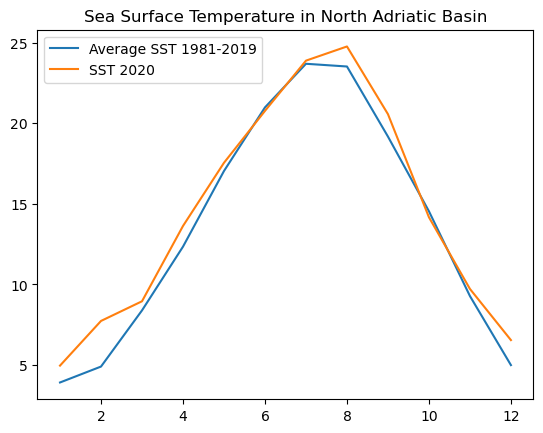

In [20]:
months = [1,2,3,4,5,6,7,8,9,10,11,12]

# Plotting each year separately (2010-2019)
# for tp in nab_tp:
#     plt.plot(months, tp)
#     plt.show()

# Plotting average for all years (2010-2019)
avg_nab_sst = np.mean(nab_sst, axis=0)
plt.plot(months, avg_nab_sst, label='Average SST 1981-2019')
plt.plot(months, sst_2020, label='SST 2020')
plt.legend()
plt.title('Sea Surface Temperature in North Adriatic Basin')
plt.show()

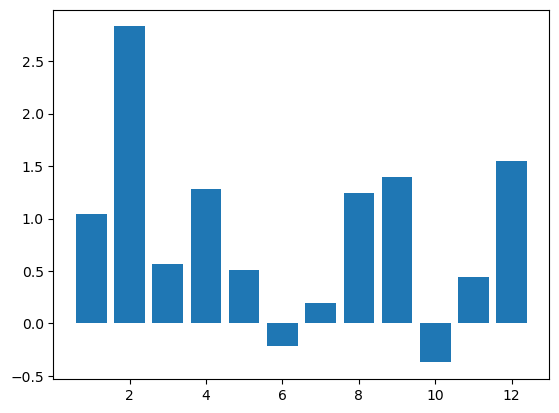

In [21]:
#Computing deviations between the two above plots
deviations = sst_2020 - avg_nab_sst
plt.bar(months, deviations)
plt.show()

In [22]:
# Using Max Min normalisation to place deviations on the same scale
devs_abs = abs(deviations)
norm_dev = (devs_abs-devs_abs.min())/(devs_abs.max()-devs_abs.min())

print('Normalized deviation for April: ', np.round(norm_dev[3], 3))

Normalized deviation for April:  0.413
